In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Lets do a imple machine learning problem.

ML is about building programs with tunable parameters (typically an array of floating point values)that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

Most ML applications it is [n_samples x n_features], and are either supervised or unsupervised.

In [2]:
from sklearn.linear_model import LinearRegression

Estimator parameters: All the parameters of an estimator can be set when it is instantiated.

Lets start off with LinearRegression

In [3]:
model = LinearRegression(normalize=True)
print model.normalize

True


In [4]:
print model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


Now let's look at estimated parameters are estimated from the data at hand.

In [5]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

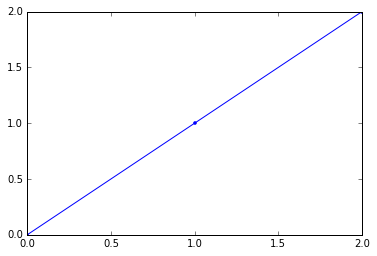

In [8]:
plt.plot(x, y, marker = '.')

In [12]:
# We're going to transpose the axis
X = x[:, np.newaxis]
x2 = np.array([0, 2, 4])
X2 = x2[:, np.newaxis]
print X, "\n", X2

[[0]
 [1]
 [2]] 
[[0]
 [2]
 [4]]


In [13]:
model.fit(X2, y) 
model.coef_

array([ 0.5])

Remember supervised learning can be split into two categories: regression and classification.

In [26]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()

# This is the split between data and classifiers
# The data and target are in floats, not actual strings.
# This is how supervised learning happens.
X, y = iris.data, iris.target

print iris.keys(), '\n', X.shape, y.shape, iris.target_names

['target_names', 'data', 'target', 'DESCR', 'feature_names'] 
(150, 4) (150,) ['setosa' 'versicolor' 'virginica']


In [27]:
# KNeighborsClassifier() --> Classifier implementing the k-nearest neighbors vote.
# It will plot the decision boundaries for each class.
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)

# Now are can prdict certain classifers
# What kind of iris has 3cm x 5cm speal and 4cm x 2cm petals
print iris.target_names[knn.predict([[3, 5, 4, 2]])]

['virginica']


In [28]:
print iris.target_names[knn.predict([[1, 2, 5, 0]])]

['virginica']


In [30]:
# But what do the actual decision boundaries look like?
# This is a visualization of the knn, but just an image of it
# not the acual code.

# from fig_code import plot_iris_classification
# plot_iris_classification(neighbors.KNeighborsClassifier, n_neighbors=3)

In [35]:
from sklearn.svm import SVC
unknown_iris = [[3, 5, 4, 2]]
unknown_iris2 = [[1, 6, 2, 5]]

# Use SVC to train and predict the species of the unknown iris...

# It could be any number really, but this is just the one that is used.

print iris.target_names[knn.predict(unknown_iris)], iris.target_names[knn.predict(unknown_iris2)]

['virginica'] ['setosa']


Lets try a regression model.

In [36]:
# Create some simple data
np.random.seed(12)

In [38]:
# 20 rows and 1 col
X = np.random.random(size=(20,1))

# Squeeze() --> Remove single-dimensional entries from the 
# shape of an array.

# 20 col and 1 row
y = 3 * X.squeeze() + 2 + np.random.normal(size = 20)

print X, y

[[ 0.08427267]
 [ 0.7325207 ]
 [ 0.63619999]
 [ 0.02790779]
 [ 0.30017006]
 [ 0.22085252]
 [ 0.05501999]
 [ 0.52324607]
 [ 0.41636966]
 [ 0.04821875]
 [ 0.57240452]
 [ 0.80351665]
 [ 0.11360172]
 [ 0.27711721]
 [ 0.64167809]
 [ 0.49273731]
 [ 0.50655608]
 [ 0.46144026]
 [ 0.89474307]
 [ 0.60577769]] [ 1.10460529  6.31190634  4.90954274  2.03230837  3.06029788  1.94629398
  2.21558281  3.4264008   4.19268436  2.50230047  3.63376434  5.08835605
  2.89686553  3.0540711   2.3960488   4.50742309  2.35340947  2.37475913
  4.57896123  4.32935524]


In [44]:
# Fit a linear regression to the data
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
# First you fit
model.fit(X, y)

print model, '\n', "Model coefficient: %.5f, and intercept: %.5f" % (model.coef_, model.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 
Model coefficient: 3.67803, and intercept: 1.79834


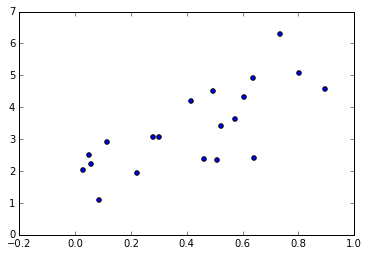

In [50]:
# Plot the data and the model prediction

# Create random numbers and transpose them.
X_test = np.linspace(0, 1, 100)[:, np.newaxis]

# Then you predict, based on the "model" you created in the previous cell
y_test = model.predict(X_test)

import pylab as plt

plt.scatter(X, y)

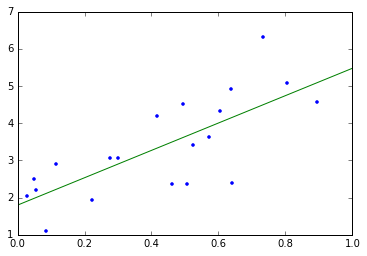

In [55]:
plt.plot(X.squeeze(), y, '.')

# This is the regression line
plt.plot(X_test.squeeze(), y_test);

Lets take a look at unsupervised learning.

Here the data has not labels and we are interested in finding similarities between the objects in question.

This is a way to discovering labels from the data.

UL comprises tasks such as dimensionality reduction, clustering, and density estimation. We can even use UL to determine combinations of the measurements which best display the structure of the data.

You can use UL discoveries to then run this on SL methods.

In [69]:
X, y = iris.data, iris.target

# This will form the basis for the UL
from sklearn.decomposition import PCA

# Where going to extract n combinations of variables to visualize this.
# We're only looking at X, and not the actual features
num_components = 2
pca = PCA(n_components = components)
pca.fit(X)
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

Reduced dataset shape: (150, 2)


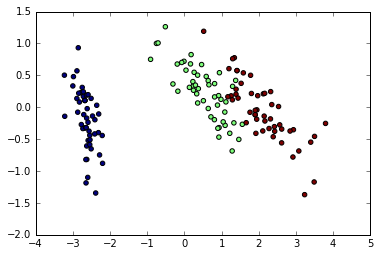

In [66]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y);

In [71]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [70]:
# But what does that mean?

print "Meaning of the %d components:" % num_components
for component in pca.components_:
    print " + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
-0.66 x sepal length (cm) + -0.73 x sepal width (cm) + 0.18 x petal length (cm) + 0.07 x petal width (cm)


Now we should look at clustering